## Importing the libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Looking at the data

In [3]:
data = pd.read_csv(r'SQL - Retail Sales Analysis_utf .csv')

In [4]:
data.head()

,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantity,price_per_unit,cogs,total_sale,year,month,sale_hour,gains
0,180,2022-11-05,10:47:00,117,Male,41,Clothing,3.0,300.0,129.0,900.0,2022,11,10,Profit
1,522,2022-07-09,11:00:00,52,Male,46,Beauty,3.0,500.0,145.0,1500.0,2022,7,11,Profit
2,559,2022-12-12,10:48:00,5,Female,40,Clothing,4.0,300.0,84.0,1200.0,2022,12,10,Profit
3,1180,2022-01-06,08:53:00,85,Male,41,Clothing,3.0,300.0,129.0,900.0,2022,1,8,Profit
4,1522,2022-11-14,08:35:00,48,Male,46,Beauty,3.0,500.0,235.0,1500.0,2022,11,8,Profit


## Revenue by Top 5 Customers

In [5]:
top_5_ids = data['customer_id'].value_counts().head(5).index
top_customers = data[data['customer_id'].isin(top_5_ids)]

revenue = top_customers.groupby('customer_id')['total_sale'].sum().reset_index()

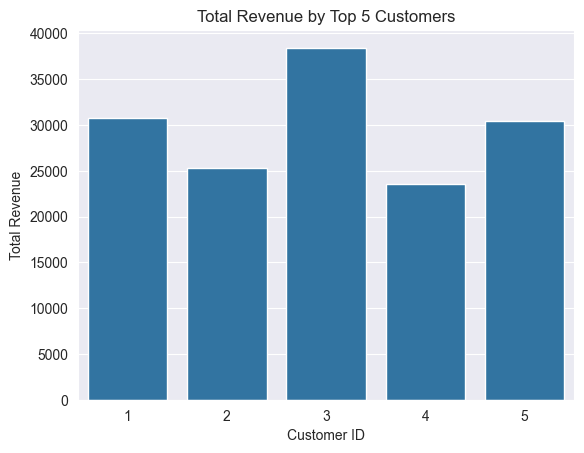

In [6]:
sns.barplot(data=revenue, x='customer_id', y='total_sale')
plt.title('Total Revenue by Top 5 Customers')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.show()

## Category Preference of Top 5 Customers

In [7]:
category_pref = (
    top_customers
    .groupby(['customer_id', 'category'])
    .size()
    .reset_index(name='count')
)

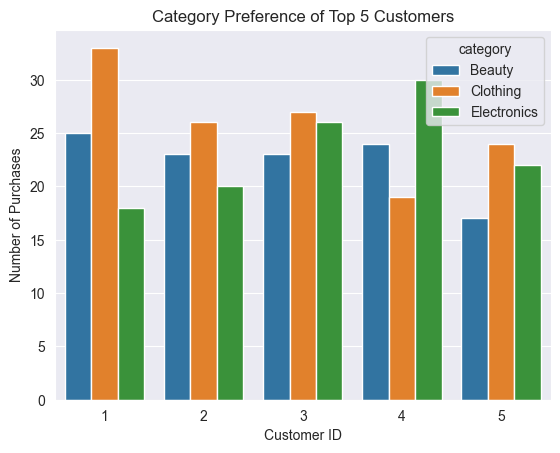

In [8]:
sns.barplot(
    data=category_pref,
    x='customer_id',
    y='count',
    hue='category'
)
plt.title('Category Preference of Top 5 Customers')
plt.xlabel('Customer ID')
plt.ylabel('Number of Purchases')
plt.show()

## Category Analysis by Gender

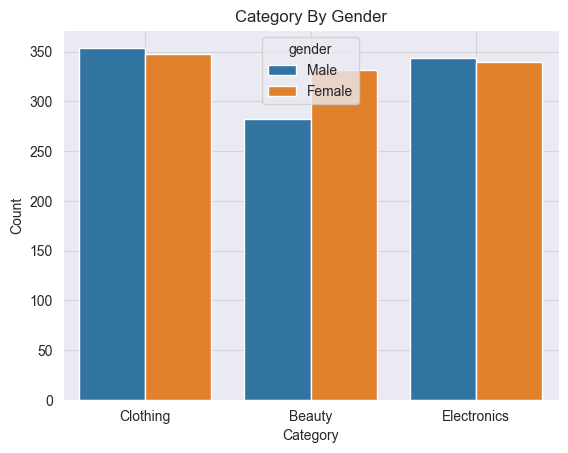

In [9]:
sns.countplot(data=data, x='category', hue='gender')
plt.title('Category By Gender')
plt.xlabel('Category')
plt.ylabel('Count')
plt.grid(True, alpha=0.2, color='grey')
plt.show()

## Category and Gender graph

In [10]:
gender = data['gender'].value_counts()
category = data['category'].value_counts()

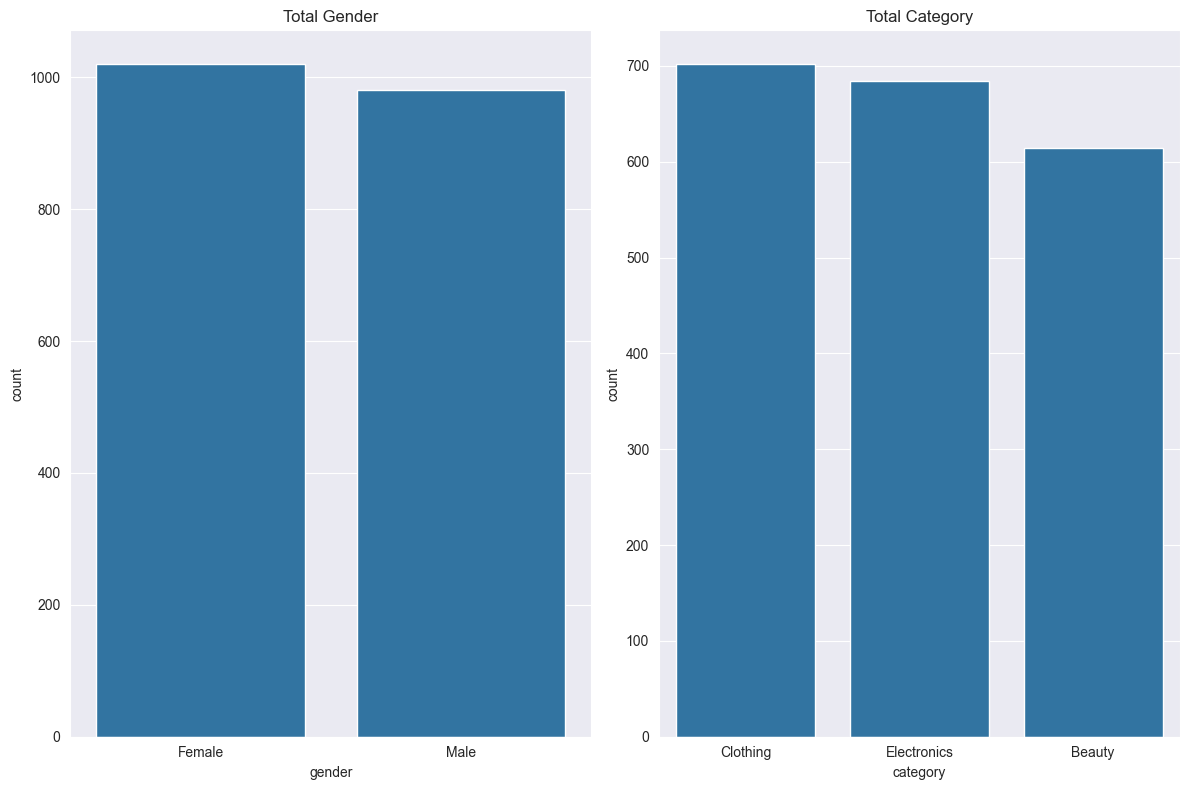

In [11]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
sns.barplot(gender)
plt.title('Total Gender')

plt.subplot(1, 2, 2)
sns.barplot(category)
plt.title('Total Category')

plt.tight_layout()
plt.show()

## 2022 and 2023 Sales Comparison

In [12]:
year2 = data[data['year'] == 2022]
y2f = year2.groupby(['year','month']).size().sort_values(ascending=False).head().reset_index(name='count')

year3 = data[data['year'] == 2023]
y3f = year3.groupby(['year','month']).size().sort_values(ascending=False).head().reset_index(name='count')

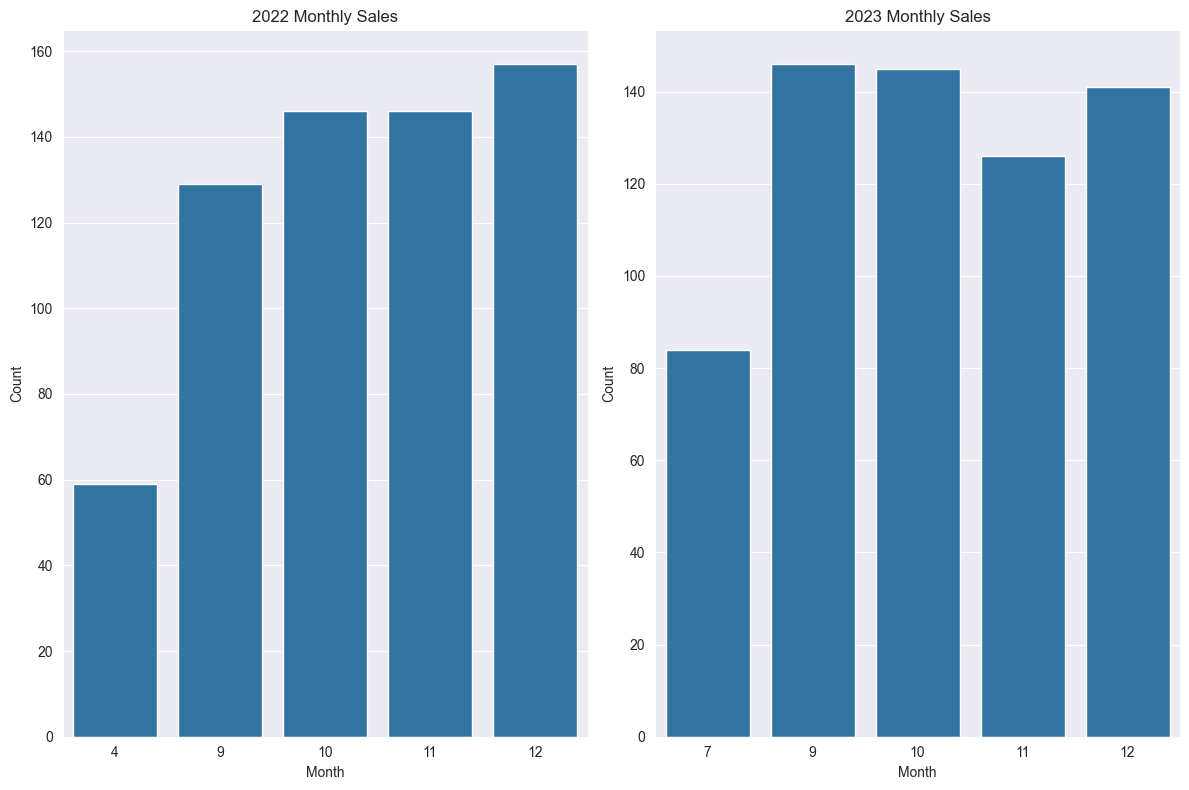

In [13]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
sns.barplot(data=y2f, x='month', y='count')
plt.title('2022 Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.barplot(data=y3f, x='month', y='count')
plt.title('2023 Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Profit and Loss

In [14]:
gains = data['gains'].value_counts()

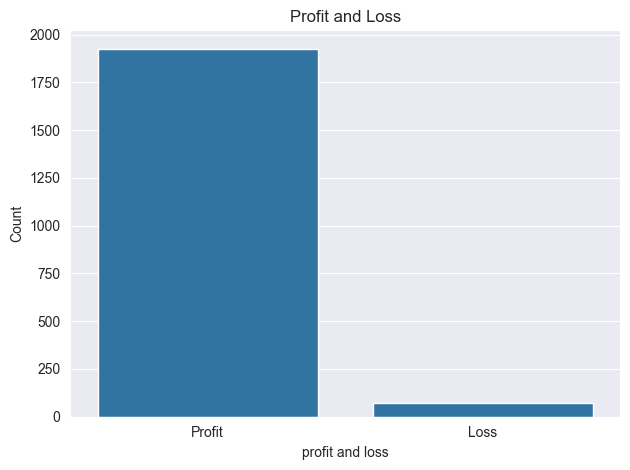

In [15]:
sns.barplot(data=gains)
plt.title('Profit and Loss')
plt.xlabel('profit and loss')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Profit and Loss by year

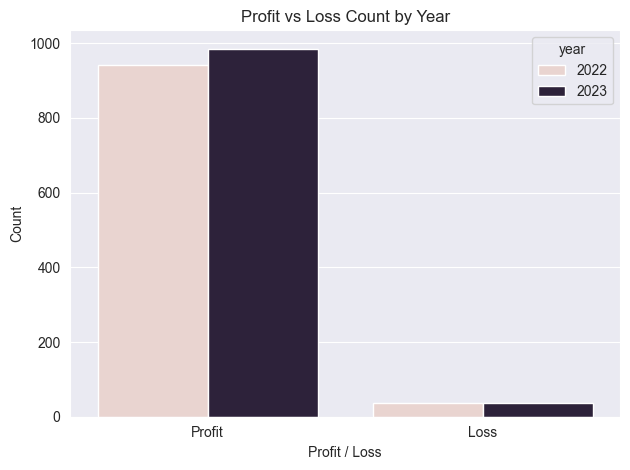

In [16]:
sns.countplot(data=data, x='gains', hue='year')
plt.title('Profit vs Loss Count by Year')
plt.xlabel('Profit / Loss')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## At what age they spend more?

In [17]:
avg_age = data.groupby('age')['total_sale'].mean().sort_values(ascending=False).reset_index()

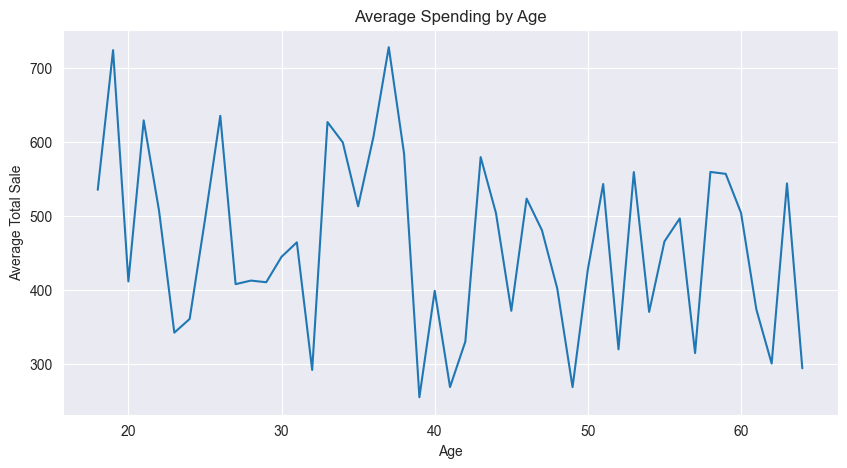

In [18]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_age, x='age', y='total_sale')
plt.title('Average Spending by Age')
plt.xlabel('Age')
plt.ylabel('Average Total Sale')
plt.show()

## Sale hour range

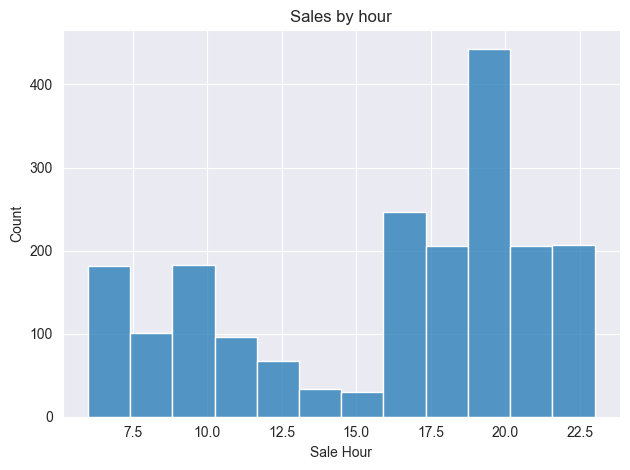

In [19]:
sns.histplot(data=data, x='sale_hour')
plt.title('Sales by hour')
plt.xlabel('Sale Hour')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Heatmap

In [20]:
num = data[['quantity','price_per_unit','cogs','total_sale','year','month','sale_hour']].corr()

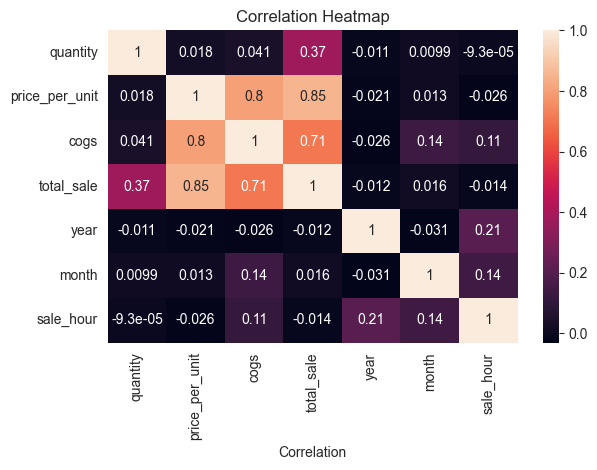

In [21]:
sns.heatmap(num, annot=True)
plt.title('Correlation Heatmap')
plt.xlabel('Correlation')
plt.tight_layout()
plt.show()

## Boxplot

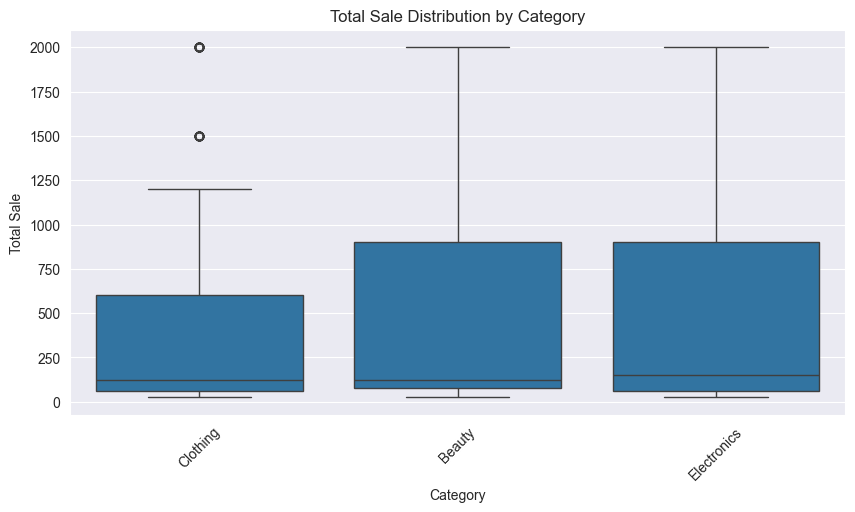

In [22]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='category', y='total_sale')
plt.title('Total Sale Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Total Sale')
plt.xticks(rotation=45)
plt.show()